In [1]:
using LaTeXStrings
using GaussianProcesses
using GaussianProcesses: grad_slice!, cov!, addcov!, KernelData
import GaussianProcesses: get_params, set_params!, num_params
import GaussianProcesses: distance, optimize!
import GaussianProcesses: Mean, Kernel, grad_stack!, grad_stack
import PDMats: AbstractPDMat, PDMat
import Base: mean
using Distributions
using Base.LinAlg
using Distances
using DataFrames
using GeoJSON
using Optim
using GLM
import MultivariateStats
mvst=MultivariateStats

import PyPlot; plt=PyPlot
plt.rc("figure", dpi=300.0)
plt.rc("figure", figsize=(6,4))
# plt.rc("figure", autolayout=true)
plt.rc("savefig", dpi=300.0)
plt.rc("text", usetex=true)
plt.rc("font", family="serif")
plt.rc("font", serif="Palatino")
cbbPalette = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
;

In [2]:
NYC_sales=readtable("NYC_data/processed/NYC_sales.csv", header=true)
;

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] #readtable#233(::Bool, ::Char, ::Array{Char,1}, ::Char, ::Array{String,1}, ::Array{String,1}, ::Array{String,1}, ::Bool, ::Int64, ::Array{Symbol,1}, ::Array{Any,1}, ::Bool, ::Char, ::Bool, ::Int64, ::Array{Int64,1}, ::Bool, ::Symbol, ::Bool, ::Bool, ::DataFrames.#readtable, ::String) at /Users/imolk/Library/Julia/packages_experimental/v0.6/DataFrames/src/deprecated.jl:1050
 [3] (::DataFrames.#kw##readtable)(::Array{Any,1}, ::DataFrames.#readtable, ::String) at ./<missing>:0
 [4] include_string(::String, ::String) at /Users/imolk/bin/julia_v0.6.2_binary/lib/julia/sys.dylib:?
 [5] include_string(::Module, ::String, ::String) at /Users/imolk/Library/Julia/packages_experimental/v0.6/Compat/src/Compat.jl:174
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/imolk/Library/Julia/packages_experimental/v0.6/IJulia/src/execute_request.jl:154
 [7] (::Compat.#inner#16{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Soc

In [3]:
using PyCall
PyCall.unshift!(PyVector(pyimport("sys")["path"]), "")
@PyCall.pyimport NYC_prepare_plots

In [4]:
using StatsBase: percentile

In [5]:
plt.rc("text", usetex=true)

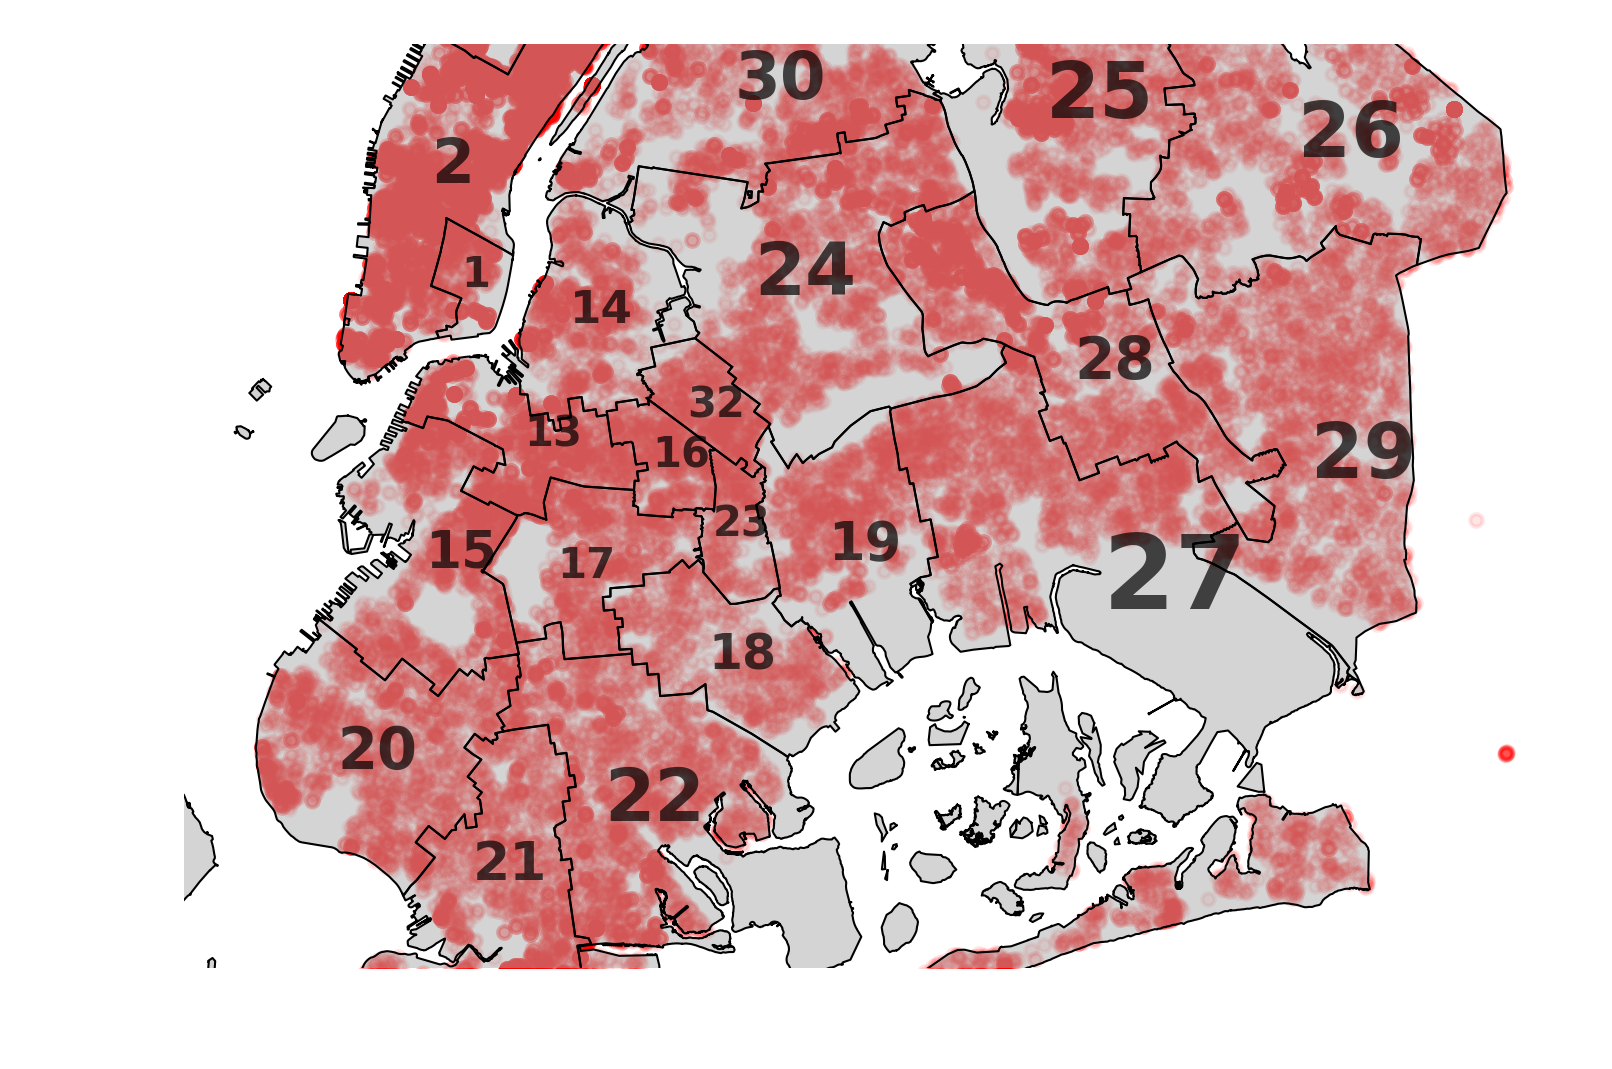

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x12f471780>

In [6]:
plt.scatter(NYC_sales[:XCoord], NYC_sales[:YCoord], marker=".", alpha=0.1, color="red")
plt.axes()[:set_aspect]("equal","datalim")
plt.xlim((0.98e6, 1.06e6))
plt.ylim((1.5e5, 2.2e5))
NYC_prepare_plots.background_schdistrs(plt.gca(),
            color="#AAAAAA", 
            edgecolor="black",
            linewidth=0.5,
            linestyle="-")
ax = plt.gca()
# ax[:set_autoscale_on](false)
plt.rc("text", usetex=false)
NYC_prepare_plots.schdistr_labels(plt.gca(), color="black", alpha=0.7, scaleup=1/5.0)
plt.rc("text", usetex=true)
plt.xlim((0.98e6, 1.06e6))
plt.ylim((1.5e5, 2.2e5))
plt.axes()[:set_aspect]("equal","datalim")
# gpd.plotting[:plot_dataframe](nycdistrs, edgecolor="grey", color="None", ax=plt.gca())
plt.axis("off")
# plt.xlim(percentile(NYC_sales[:XCoord].values,10),percentile(NYC_sales[:XCoord].values,97))
# plt.ylim(percentile(NYC_sales[:YCoord].values,10),percentile(NYC_sales[:YCoord].values,97))
ax = plt.gca()

In [7]:
ax[:get_window_extent]()

PyObject Bbox([[221.5, 128.49999999999997], [1623.5, 1059.5]])